+ XPath (XML Path Language) 是一种 灵活、强大的选择元素的方式，用来在 XML 和 HTML 文档中选择节点的语言。
+ xpath有 1 和 2 两个版本，目前浏览器支持的是 xpath 1的语法。

In [1]:
from selenium import webdriver
wd = webdriver.Chrome('driver/chromedriver.exe')
wd.implicitly_wait(2)
wd.get('http://cdn1.python3.vip/files/selenium/test1.html')

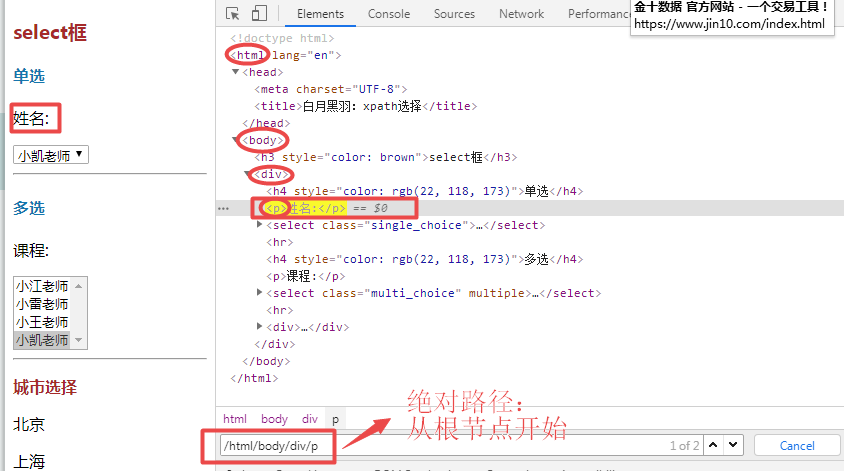
# 绝对路径
从根节点开始的，到某个节点，每层都依次写下来

In [2]:
element = wd.find_element_by_xpath('/html/body/div/p')
element.text

'姓名:'

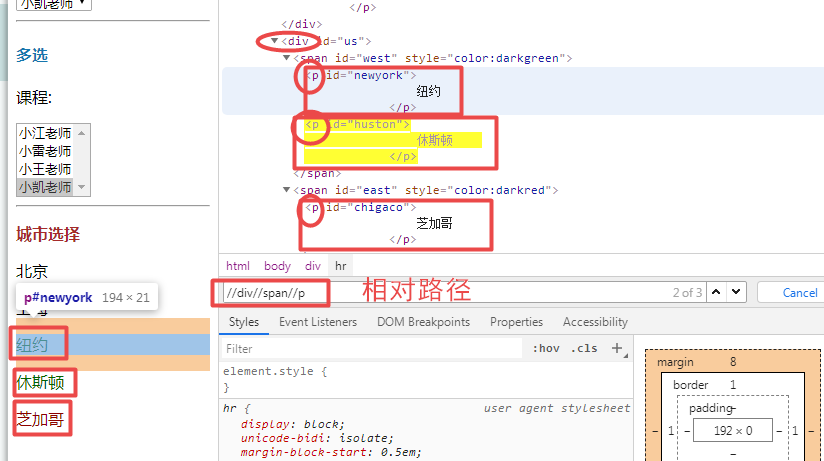
# 相对路径
+ xpath需要前面加 //div 表示所有标签名为 div 的元素 
+ // 符号也可以继续加在后面,比如这样写 //div//p（所有div里的 所有p）

In [4]:
A = wd.find_elements_by_xpath('//div//span//p')
for a in A:
    print(a.text)

纽约
休斯顿
芝加哥


## *特殊
###  //div/*   ：   表示所有div节点下的所有直接子节点

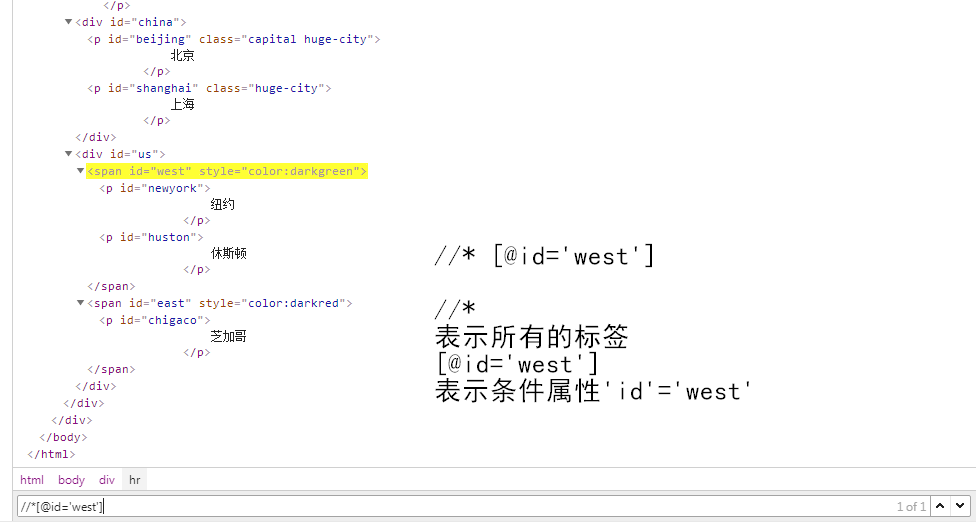
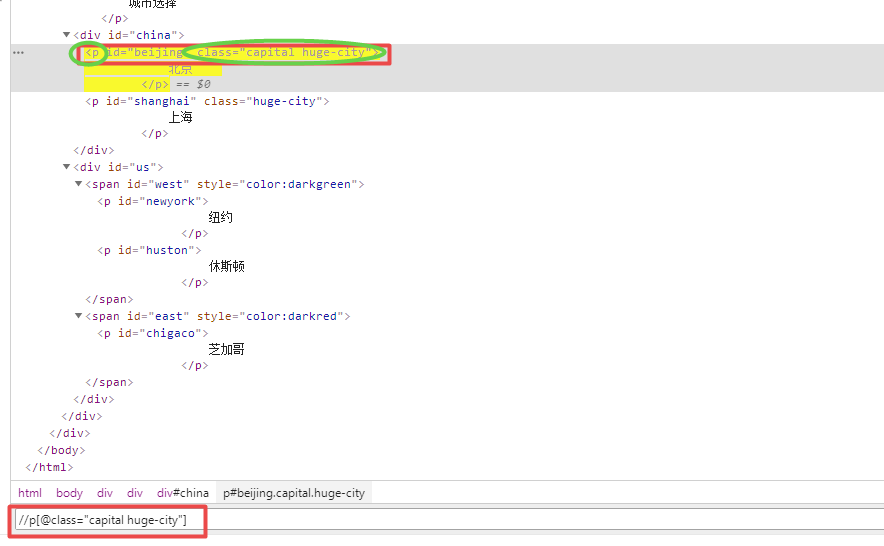
# 根据属性 选择元素
+ 注意：
    + 属性名注意前面有个@
    + 属性值一定要用引号， 最好是双引号

In [10]:
B = wd.find_element_by_xpath('//*[@id="west"]')
print(B.text)
print('-------------------------------------------------------------------------------')
C = wd.find_element_by_xpath('//p[@class="capital huge-city"]')
print(C.text)

纽约
休斯顿
-------------------------------------------------------------------------------
北京


# 包含关系的筛选
## 一.css语法
### 1. A属性包含 'aaa'
div[A *= "aaa"]
### 2. A属性以 'aaa'开头
div[A ^= "aaa"]
### 3. A属性以 'aaa'结尾
div[A $= "aaa"]
## 二.xpath语法
### 1. B属性包含 'bbb'
//div[contains(@B,"bbb")]
### 2. B属性以 'bbb'开头
//div[starts-with(@B,"bbb")]
### 3. B属性以 'bbb'结尾 ------ 目前不支持
//div[starts-with(@B,"bbb")]

# 按次序选择子节点
## 一.任意型
### /span/*[2] 
*span的第二个儿子(任意类儿子)*
### /span/*[last()-1] 
*span的倒数第二个儿子(任意类儿子)*
## 二.type型
### /span[2] 
*父的第二个span类儿子*  
相当于：span:nth-of-type(2)
### /span[last()-1]
*父的倒数第二个span类儿子*    
相当于：span:nth-last-of-type(2)

# 按次序 范围选择 前几个 后几个 节点
### 前2个
+ /span[position()<=2]
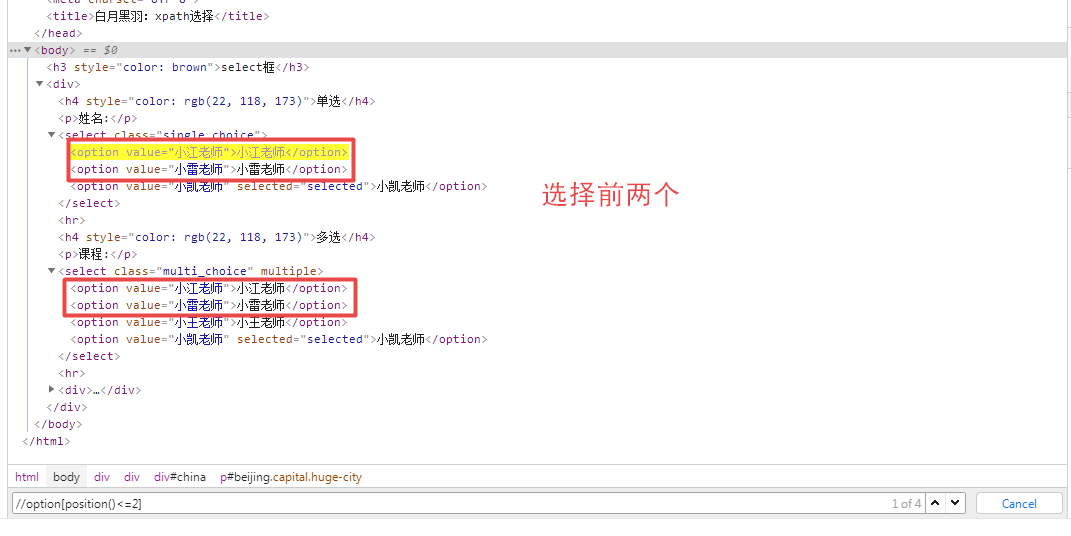
### 后2个
+ /span[position()>=last()-1]
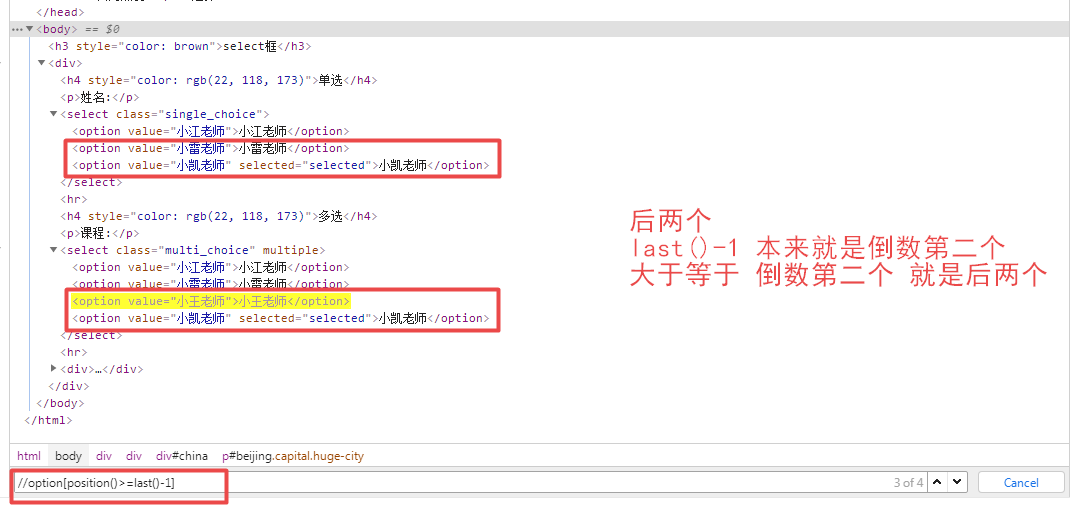

# 组合选择
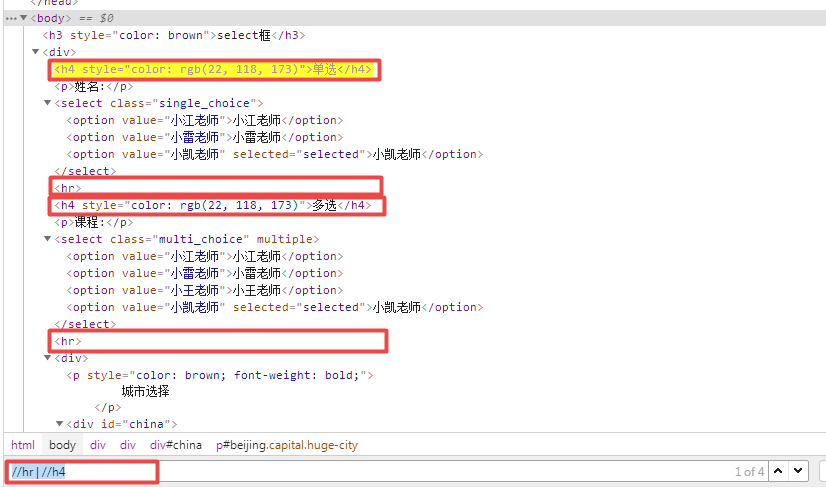
+ //hr | //h4
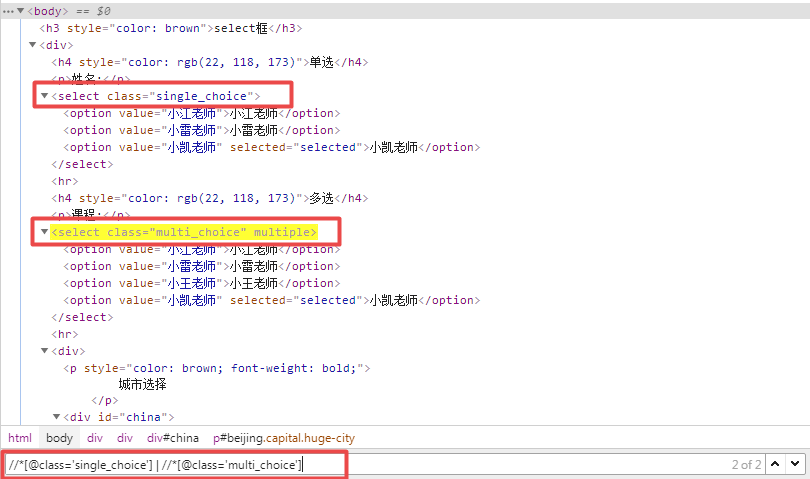

# 选择父节点
+ xpath可以选择父节点， **这是css做不到的**。

+ 某个元素的 父节点 用 /.. 表示
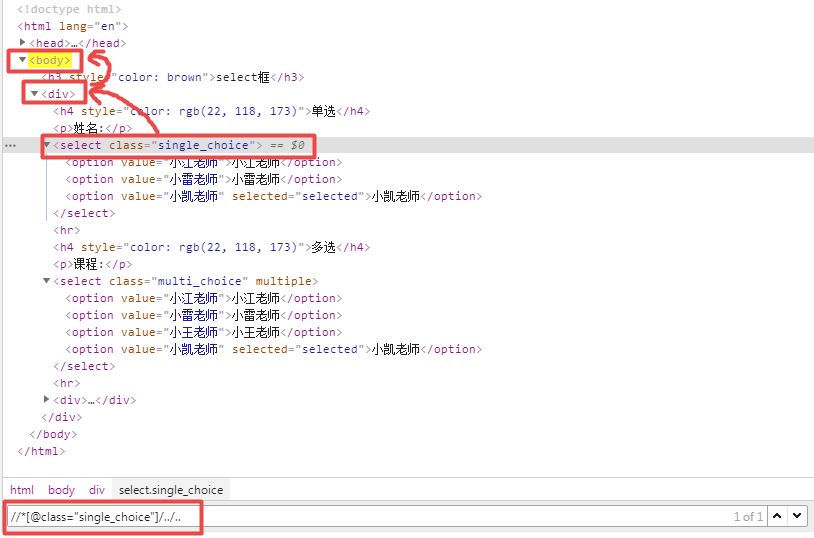

# 选择兄弟节点
## 弟弟节点
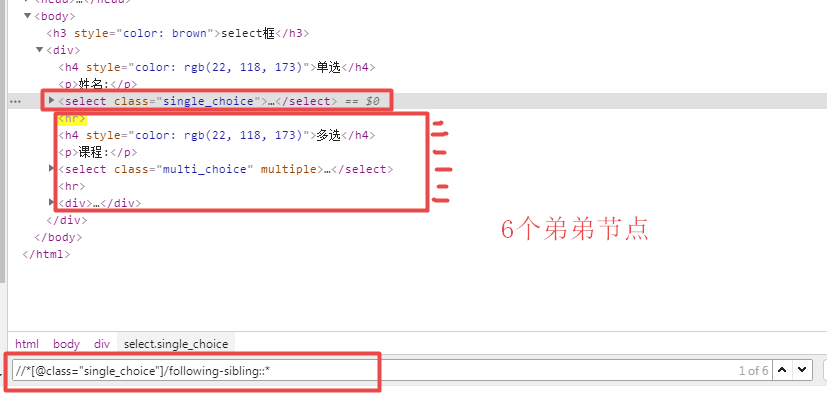
+ xxxx/following-sibling::*  所有弟弟
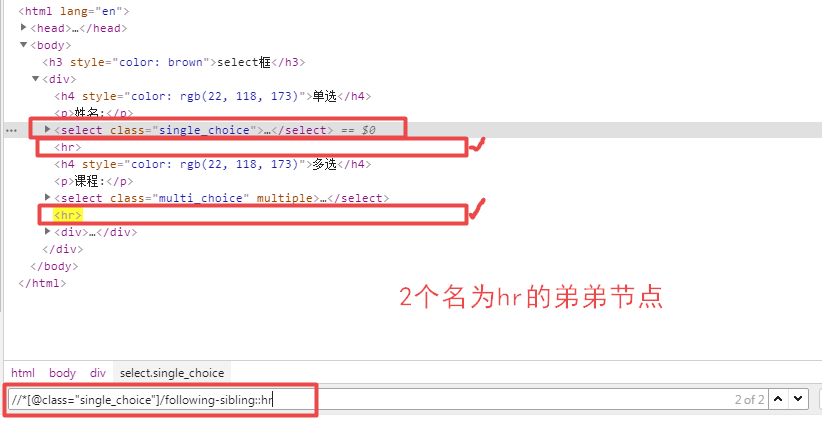
+ xxxx/following-sibling::xx 名叫xx的弟弟
## 哥哥节点
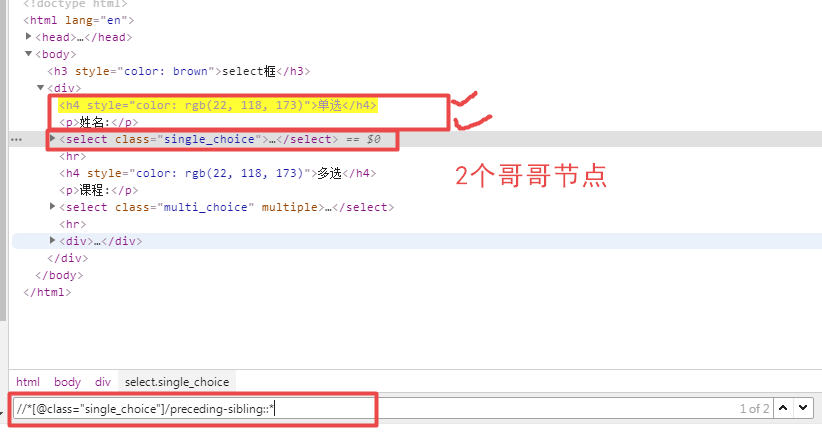
+ xxxx/preceding-sibling::*  所有哥哥
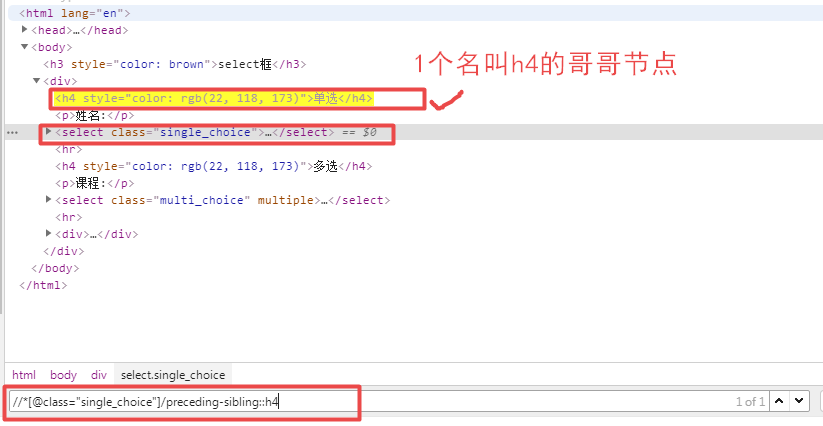
+ xxxx/preceding-sibling::xx 名叫xx的哥哥

# *一个坑 请注意
+ 要在某个元素内部使用xpath选择元素， 需要 在xpath表达式最前面加个点 .
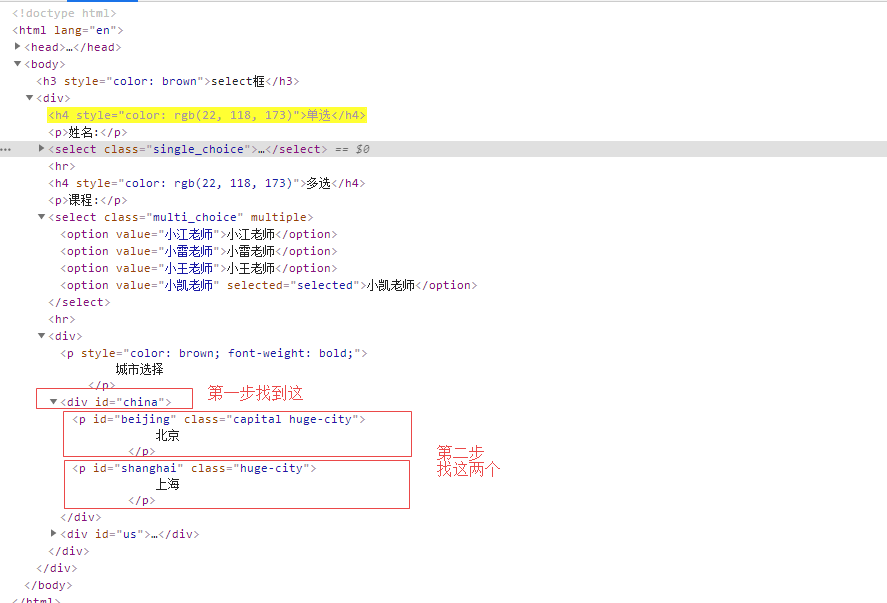

In [15]:
A = wd.find_element_by_id('china')

a1 = A.find_elements_by_xpath('//p') # 这一步错了
for x in a1:
    print('-------------------------------------------------------------------------------')
    print(x.text)
print('============================错误错误错误错误错误错误===========================')
a2 = A.find_elements_by_xpath('.//p') # 要在某个元素内部使用xpath选择元素， 需要 在xpath表达式最前面加个点 .
for x in a2:
    print('-------------------------------------------------------------------------------')
    print(x.text)


-------------------------------------------------------------------------------
姓名:
-------------------------------------------------------------------------------
课程:
-------------------------------------------------------------------------------
城市选择
-------------------------------------------------------------------------------
北京
-------------------------------------------------------------------------------
上海
-------------------------------------------------------------------------------
纽约
-------------------------------------------------------------------------------
休斯顿
-------------------------------------------------------------------------------
芝加哥
============================错误错误错误错误错误错误===========================
-------------------------------------------------------------------------------
北京
-------------------------------------------------------------------------------
上海
